# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from sklearn import datasets
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [3]:
# Your code here
boston_data = pd.read_csv('../data/boston_data.csv')
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
boston_data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [5]:
boston_data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
corr_mtrx = boston_data.corr()
corr_mtrx

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

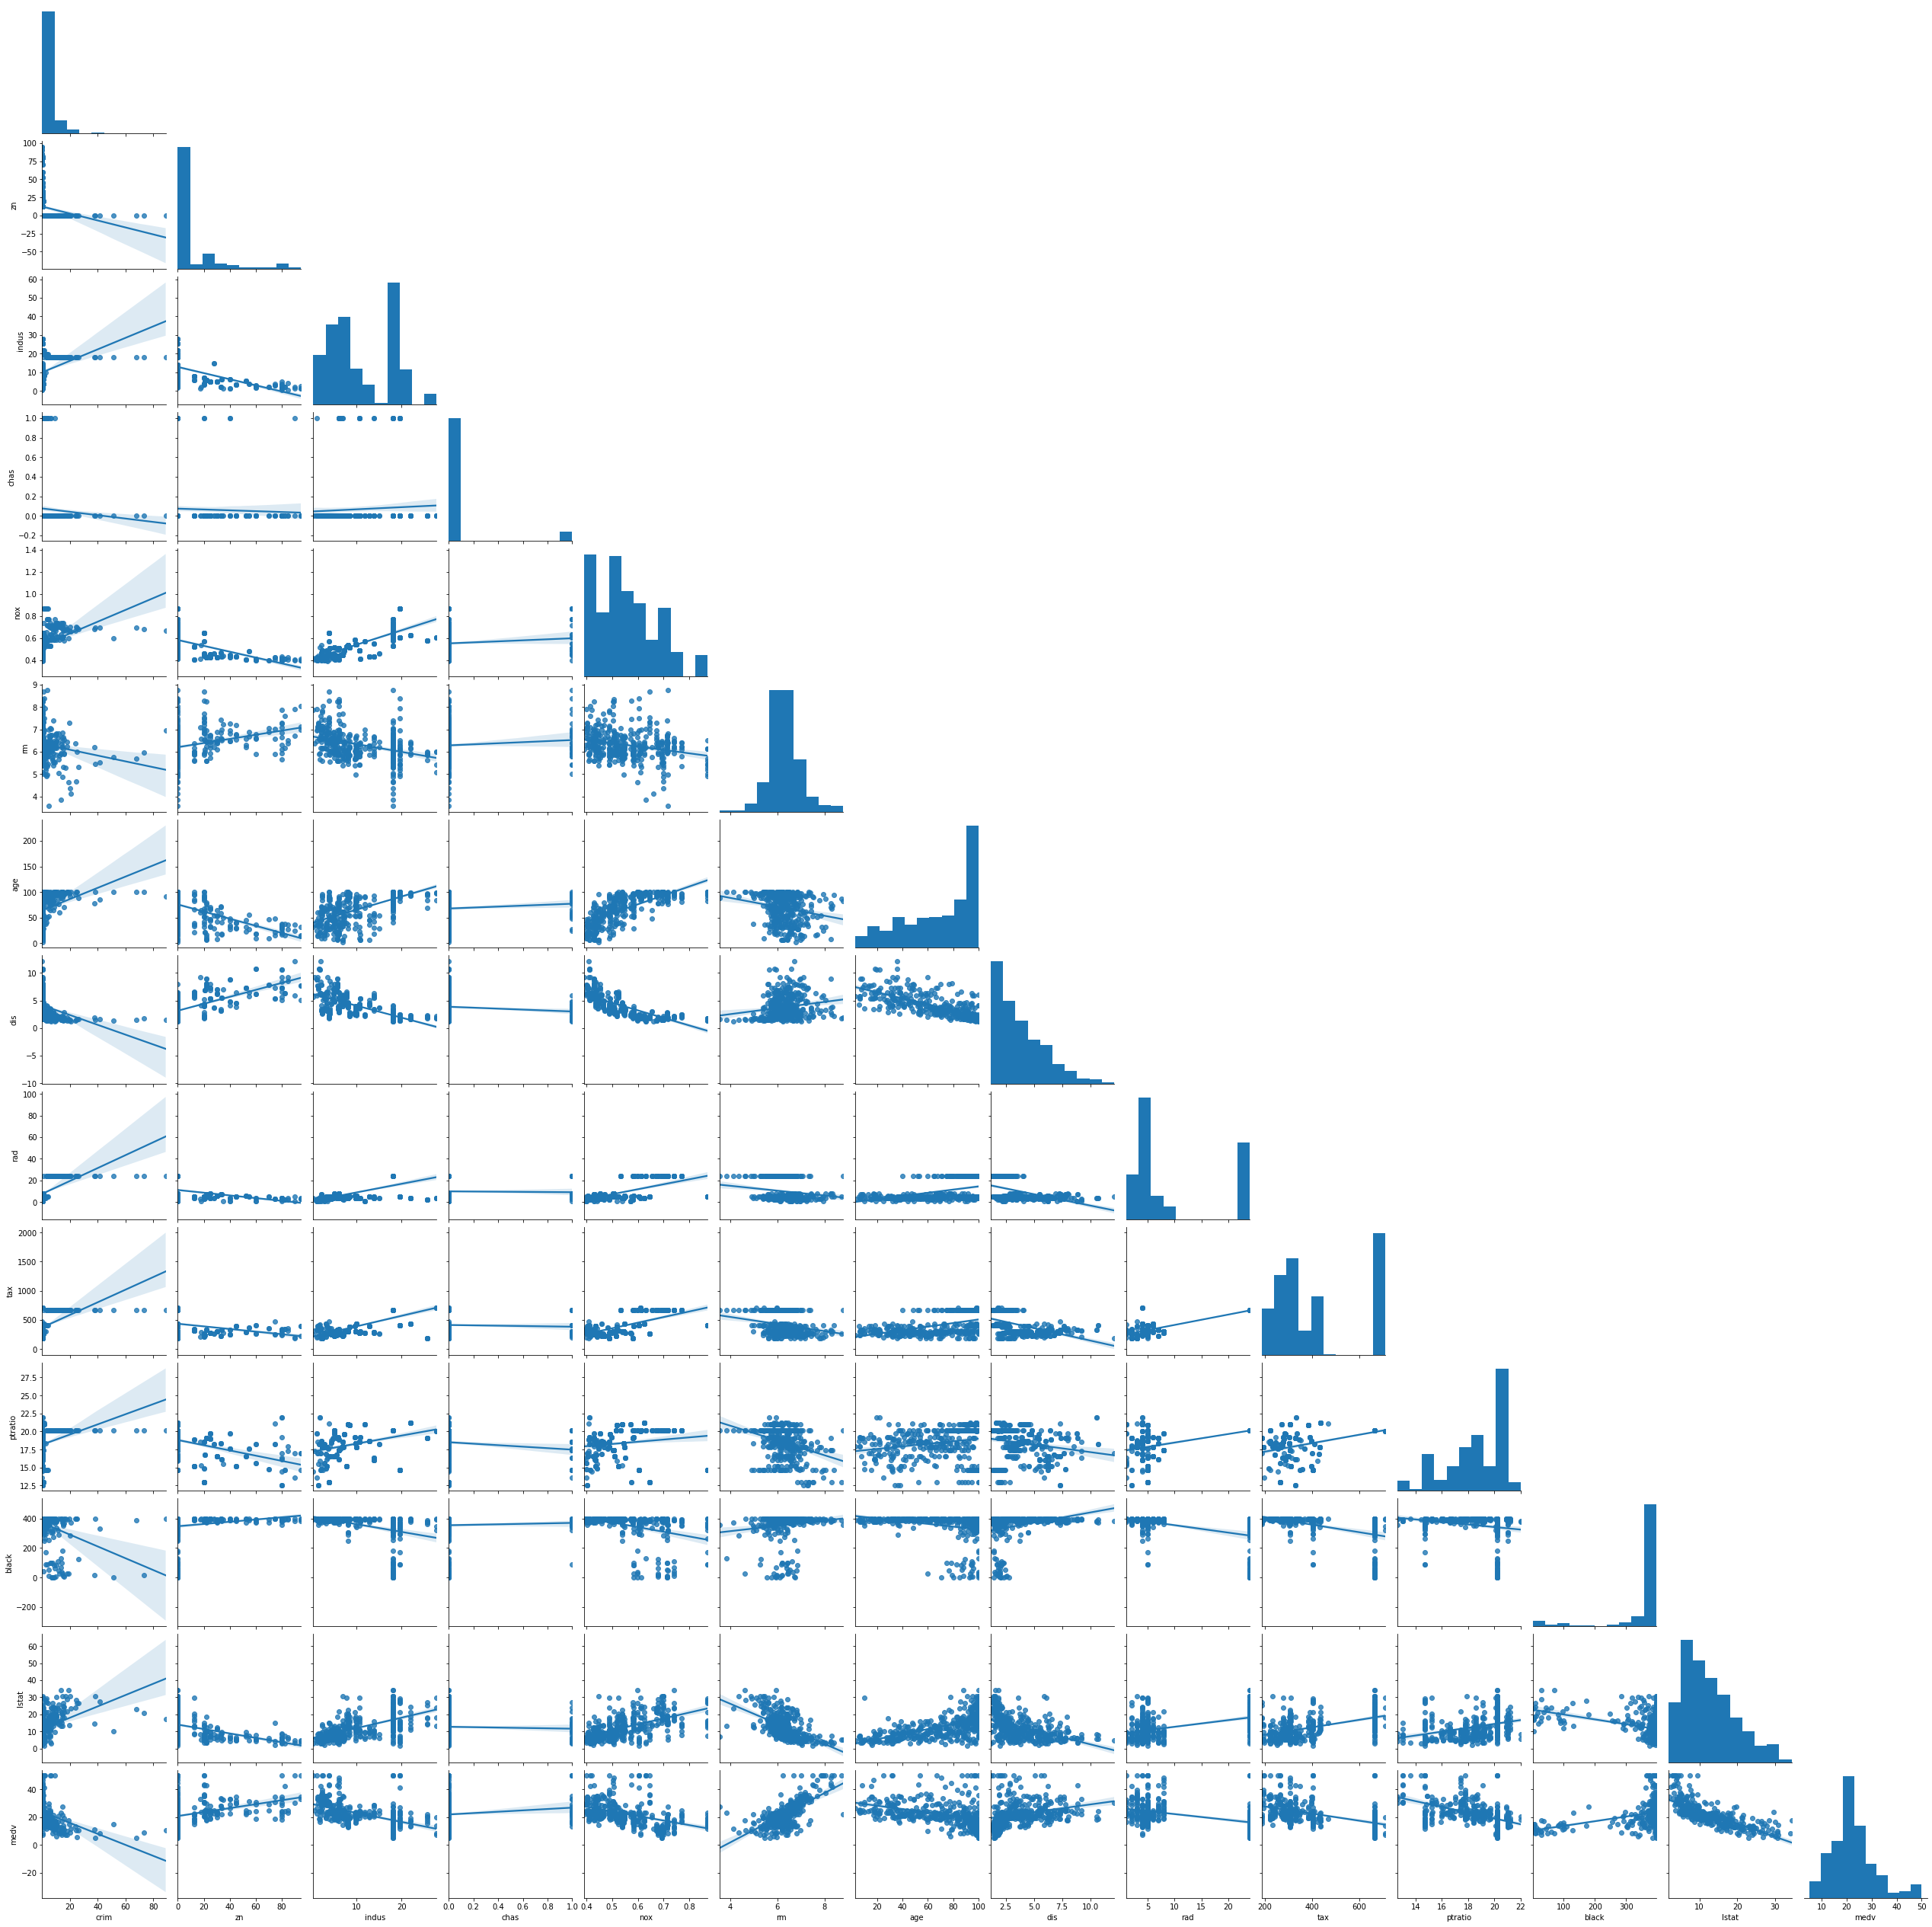

In [7]:
sb.pairplot(boston_data, kind="reg", corner=True)

In [8]:
boston_data = boston_data.drop(['chas'], axis=1)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [9]:
# Your response here
'''
From the reg plot I can select that the values that seem to have a linear correlation, 
wheter positive or negative, with the medv are all of them but 'chas'.
'''

"\nFrom the reg plot I can select that the values that seem to have a linear correlation, \nwheter positive or negative, with the medv are all of them but 'chas'.\n"

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

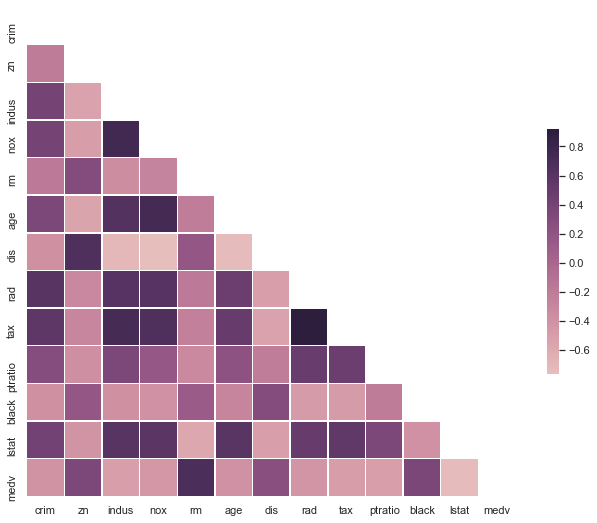

In [11]:
corr = boston_data.corr()
sb.set(style="white")
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.cubehelix_palette(as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
boston_data = boston_data.drop(['dis'], axis=1)

In [ ]:
# Your response here
'''
The variable 'dis' doesn't seem to be relevant to explain the medv with a correlation tending to 0.
'''

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [13]:
x = boston_data.describe()

In [ ]:
# Your code here

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [14]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [15]:
# Your code here
y = boston_data['medv']
X = boston_data.drop(columns = ['medv'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [25]:
pred1_train = regr1.predict(X_train)
pred1_test = regr1.predict(X_test)

pred2_train = regr2.predict(X_train)
pred2_test = regr2.predict(X_test)

pred3_train = regr3.predict(X_train)
pred3_test = regr3.predict(X_test)

pred4_train = regr4.predict(X_train)
pred4_test = regr4.predict(X_test)

pred5_train = regr5.predict(X_train)
pred5_test = regr5.predict(X_test)

train_perf = [performance_metric(y_train, pred1_train), performance_metric(y_train, pred2_train), 
         performance_metric(y_train, pred3_train), performance_metric(y_train, pred4_train), performance_metric(y_train, pred5_train)]

test_perf = [performance_metric(y_test, pred1_test), performance_metric(y_test, pred2_test),
       performance_metric(y_test, pred3_test), performance_metric(y_test, pred4_test), performance_metric(y_test, pred5_test)]

In [26]:
print(performance_metric(y_train, pred1_train))
print(performance_metric(y_test, pred1_test))

print(performance_metric(y_train, pred2_train))
print(performance_metric(y_test, pred2_test))

print(performance_metric(y_train, pred3_train))
print(performance_metric(y_test, pred3_test))

print(performance_metric(y_train, pred4_train))
print(performance_metric(y_test, pred4_test))

print(performance_metric(y_train, pred5_train))
print(performance_metric(y_test, pred5_test))

0.7819084127935008
0.596390824877874
0.9138270217655987
0.6665712405863915
0.9522308697512603
0.705699497850735
0.9666833760917777
0.7138281667791402
0.9706657508607961
0.7039007802368059


In [30]:
depth_parameters = [2, 4, 6, 8, 10]
for i in depth_parameters:
    reg = RandomForestRegressor(max_depth=i, random_state=42).fit(X_train, y_train)
    print(reg)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
RandomForestRegr

Now, plot the score for each tree on the training set and on the testing set.

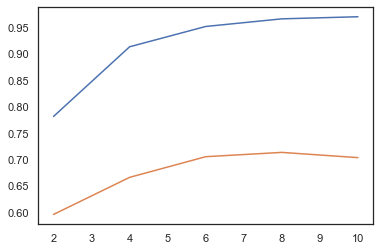

In [31]:
# Produce a plot with the score for the testing and training for the different max depths
plt.plot(depth_parameters, train_perf)
plt.plot(depth_parameters, test_perf)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
'''The more depth the level has, the best it performs but when it reaches a certain number it
normalizes'''

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [32]:
# Your response here
regr0 = RandomForestRegressor(max_depth=1, random_state=42).fit(X_train, y_train)
pred0_train = regr0.predict(X_train)
pred0_test = regr0.predict(X_test)
print(performance_metric(y_train, pred0_train))
print(performance_metric(y_test, pred0_test))

0.6102454644292382
0.42878290379875084


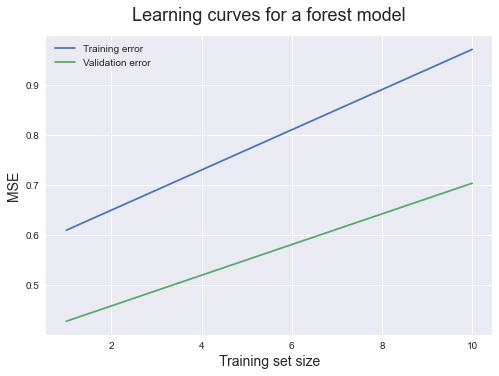

In [36]:
import matplotlib.pyplot as plt

train_sizes = [1, 10]
train_scores = [0.6102454644292382, 0.9706657508607961]
test_scores = [0.42878290379875084, 0.7039007802368059]

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores, label = 'Training error')
plt.plot(train_sizes, test_scores, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a forest model', fontsize = 18, y = 1.03)
plt.legend()


In [ ]:
'''I think the model at depth 1 suffers from high Bias'''

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [39]:
# Your response here
optimal_reg = RandomForestRegressor(max_depth=8, random_state=42).fit(X_train, y_train)

pred4_train = regr4.predict(X_train)
pred4_test = regr4.predict(X_test)

print(performance_metric(y_train, pred4_train))
print(performance_metric(y_test, pred4_test))

0.9666833760917777
0.7138281667791402


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
'''
- Probably not so relevant anymore
- I don't think so. I think they describe more about the neighborhoods than the properties themselves.
- I would'nt be so sure. The quality of the data could improve a lot more.
- Probably not. For example the crime rates would be lower in a rural area, making this variable not so determining
over the medium value of the property.